# Taller 1: operaciones elementales sobre imágenes

## Cargue la imagen regle.png y visualícela.

In [ ]:
# Modificar las rutas de las imagenes.
PATH_IMAGES = "./imagenes/"

In [3]:
import cv2

imagen_REGLE = cv2.imread(PATH_IMAGES + "REGLE.png", cv2.IMREAD_GRAYSCALE)

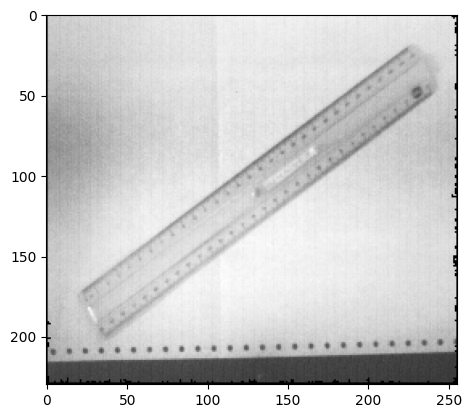

In [7]:
import matplotlib.pyplot as plt

plt.imshow(imagen_REGLE, cmap='gray')
plt.show()

## Visualice el histograma de la imagen. ¿Cómo es la dinámica de la imagen?

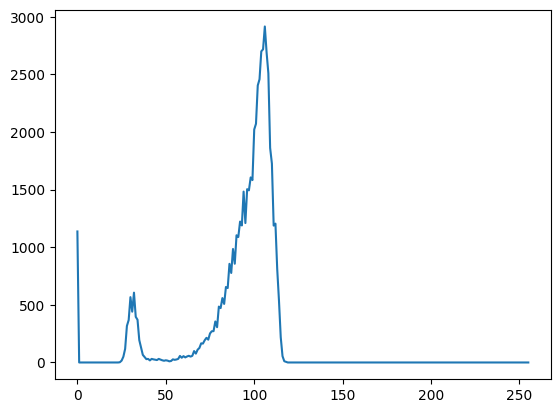

In [5]:
import matplotlib.pyplot as plt
import cv2

hist = cv2.calcHist([imagen_REGLE],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()



**Dinámica de la imagen**: En la imagen podemos notar un pico de píxeles negros, los cuales se pueden ver al borde de la imagen, lo cual parece más un defecto correspondiente a la baja calidad que una parte real de la imagen. Luego, vemos un pico de grises oscuros que corresponden a la parte inferior de la imagen, lo cual parece un fondo posiblemente un escritorio. Posteriormente, vemos el pico de intensidad principal, el cual corresponde a la composición como tal que podemos ver en la foto, incluyendo la regla y una hoja blanca como fondo.

## Calcule el negativo de esta imagen (bitwise_not) y visualice el resultado.

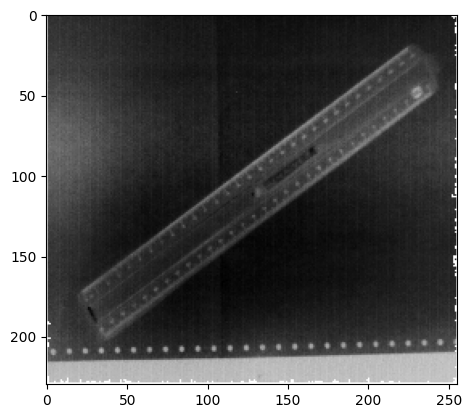

In [8]:
# Calcular el negativo
imagen_negativo = cv2.bitwise_not(imagen_REGLE)

# Visualizar
plt.imshow(imagen_negativo, cmap='gray')
plt.show()

## Visualice el histograma del negativo. ¿Cómo es este histograma con respecto al de la imagen original?

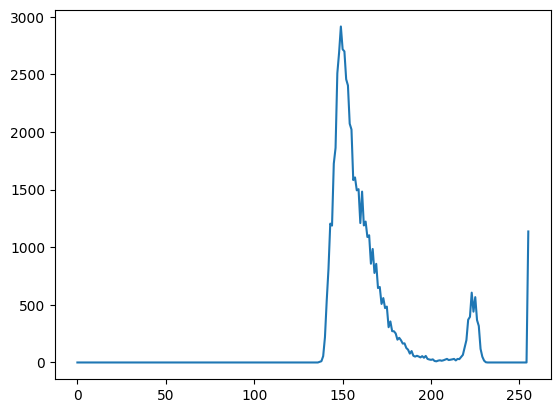

In [11]:
hist_neg = cv2.calcHist([imagen_negativo],[0],None,[256],[0,256])
plt.plot(hist_neg)
plt.show()

Se observa que el histograma está invertido simétricamente alrededor de 128. Por ejemplo, el pico principal que estaba cerca de 150 ahora está alrededor de 105 (255-150), y los valores oscuros del borde ahora son blancos.

## Haga una expansión del histograma. Visualice el resultado.

Hacemos la expansión de contraste de acuerdo con la definición: 
> Expansión del contraste: transformación lineal que permite utilizar el rango más grande de niveles de gris disponible. El mínimo nivel de gris de la imagen es llevado a cero, mientras que el máximo es llevado a 255.

Primero lo hacemos de forma manual con la imagen original y luego usando cv2 para la negativa.

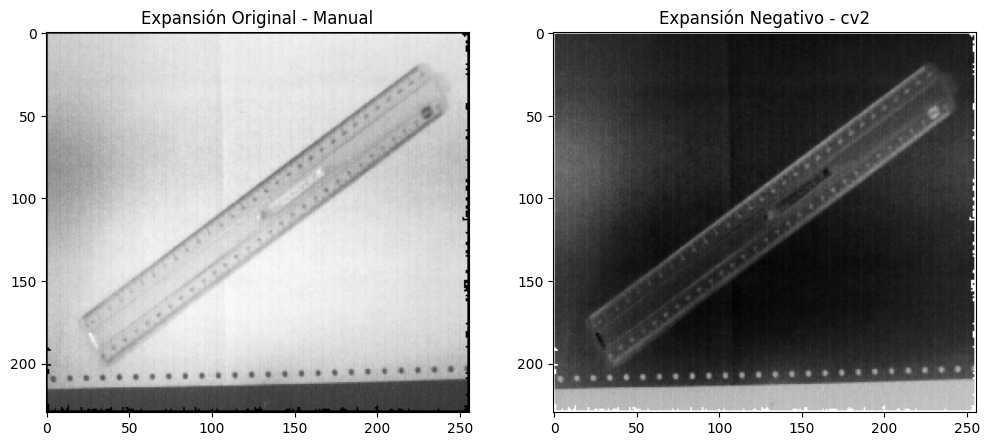

In [13]:
# Expansión manual para la imagen original
min_val = imagen_REGLE.min()
max_val = imagen_REGLE.max()
imagen_expandida = ((imagen_REGLE - min_val) * (255 / (max_val - min_val))).astype('uint8')

# Expansión con cv2 para la imagen negativa
imagen_negativo_expandida = cv2.normalize(imagen_negativo, None, 0, 255, cv2.NORM_MINMAX)

# Visualizar ambas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(imagen_expandida, cmap='gray')
axes[0].set_title('Expansión Original - Manual')
axes[1].imshow(imagen_negativo_expandida, cmap='gray')
axes[1].set_title('Expansión Negativo - cv2')
plt.show()

## Visualice el histograma de la imagen resultado. Explique el resultado.

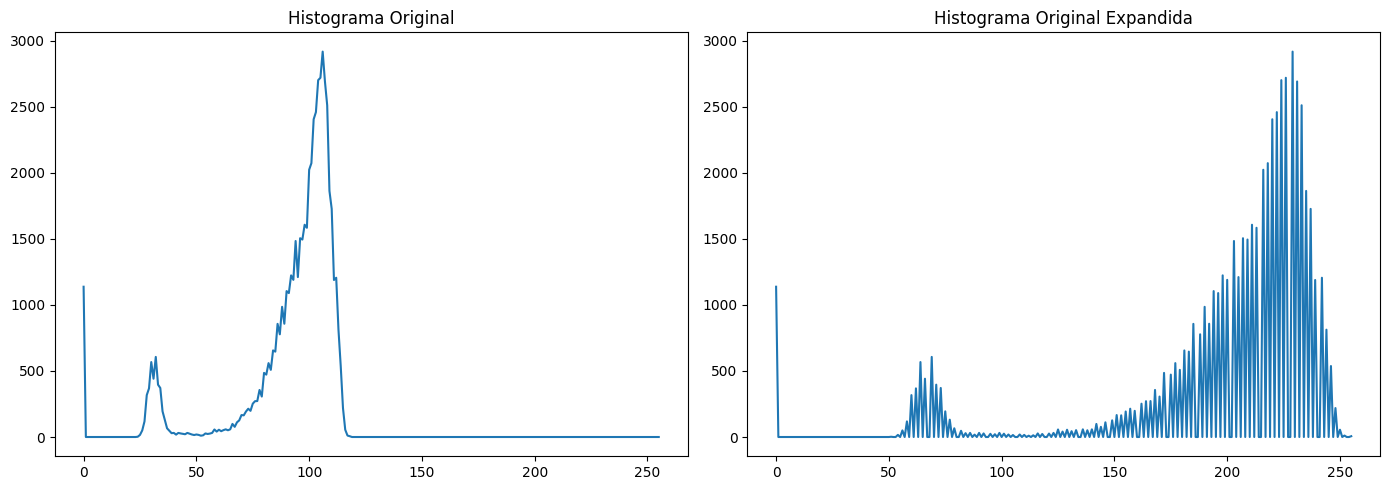

In [15]:
# Comparar histogramas: Original vs Original Expandida
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

hist_original = cv2.calcHist([imagen_REGLE],[0],None,[256],[0,256])
hist_expandida = cv2.calcHist([imagen_expandida],[0],None,[256],[0,256])

axes[0].plot(hist_original)
axes[0].set_title('Histograma Original')

axes[1].plot(hist_expandida)
axes[1].set_title('Histograma Original Expandida')

plt.tight_layout()
plt.show()

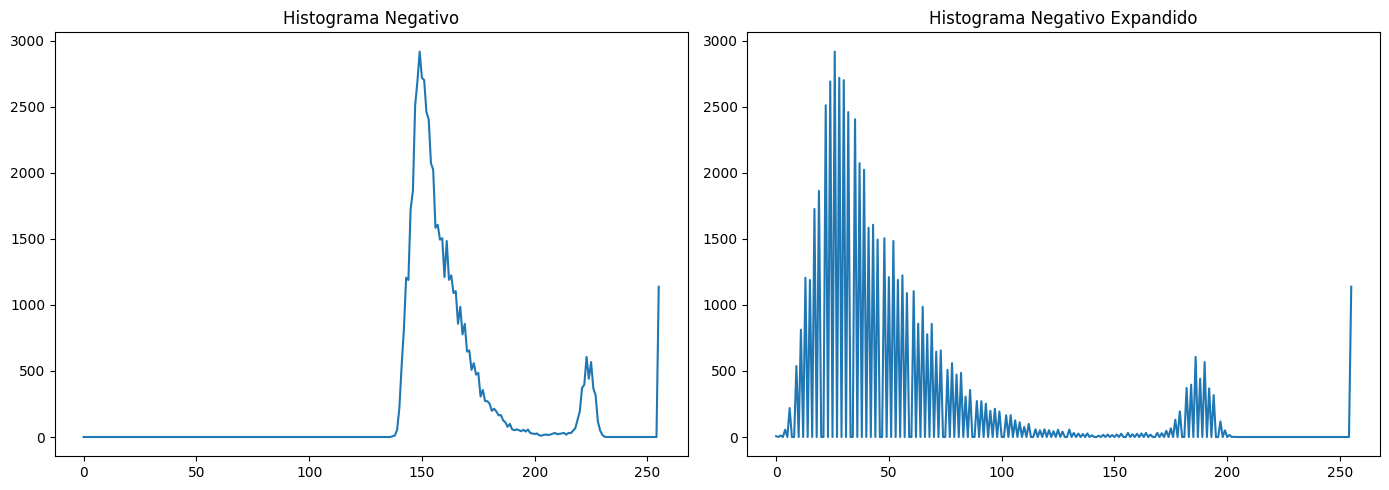

In [16]:
# Comparar histogramas: Negativo vs Negativo Expandido
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

hist_negativo = cv2.calcHist([imagen_negativo],[0],None,[256],[0,256])
hist_negativo_expandida = cv2.calcHist([imagen_negativo_expandida],[0],None,[256],[0,256])

axes[0].plot(hist_negativo)
axes[0].set_title('Histograma Negativo')

axes[1].plot(hist_negativo_expandida)
axes[1].set_title('Histograma Negativo Expandido')

plt.tight_layout()
plt.show()

Observamos la comparación entre los histogramas normales y expandidos, tanto para la imagen original como la que tuvo el tratamiento de negativo. En ambas comparaciones podemos observar que la distribución ahora tiene valores en todo el rango (lo cual es lo que debe hacer la transformación) y que ahora el histograma parece discontinuo, teniendo espacios entre valores consecutivos de la intensidad (eje X). Los valores de la frecuencia (eje Y) no se ven afectados.